In [608]:
import numpy as np
import pandas as pd

In [609]:
df=pd.read_csv('cleaned_ACS_data.csv')

In [610]:
pd.set_option('display.max_columns',None)
df.head()

,index,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Cherokee tribal grouping,Chippewa tribal grouping,Navajo tribal grouping,Sioux tribal grouping,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Native Hawaiian and Other Pacific Islander,Chamorro,Native Hawaiian,Samoan,Other Native Hawaiian and Other Pacific Islander,Some Other Race,White and Black or African American,White and American Indian and Alaska Native,White and Asian,White and Some Other Race,Black or African American and American Indian and Alaska Native,Black or African American and Some Other Race,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,"2,102","1,305",142,270,515,633,593,301,237,270,96,30,0,0,0,0,0,0,617,5,30,20,4,10,0,0,3,7,277,2,227,44,60,7,7,284,19,4,98,536,172,"1,248",676,10,15
1,Aleutians West Census Area,254,11,287,"3,484","1,735",334,319,885,831,"1,150",414,252,283,40,6,2,0,0,0,3,8,"1,845",12,65,132,58,183,0,3,176,4,285,7,93,44,197,10,31,581,2,140,79,"1,222",201,426,"2,114",183,0
2,Anchorage Municipality,49028,1152,35241,"149,144","141,530","18,328","21,652","48,906","40,272","34,222","17,449","16,837","22,832","9,338","2,598",253,172,86,95,760,"1,339","14,182",836,"2,620",389,"8,314","8,563",184,979,"5,778","1,622","7,728","4,485","11,947","6,029","4,979","1,323",468,"13,755","4,739","1,309","8,359","160,574","14,793","20,464","27,795","8,376","1,928"
3,Bethel Census Area,3074,29,573,"9,909","8,629","1,576","1,372","2,814","2,020","1,878","1,027",935,"1,004",338,93,0,2,0,3,17,0,84,0,157,0,4,40,0,3,37,0,89,0,550,6,57,28,0,164,5,0,230,"1,632",214,"15,275",260,40,0
4,Bristol Bay Borough,145,4,149,489,365,40,45,196,97,76,67,92,63,39,6,0,0,0,0,0,0,47,1,0,0,0,17,0,17,0,0,22,1,53,30,18,0,0,30,37,0,7,379,3,257,48,17,11


In [611]:
df.columns
columns_integers=df.columns[1:]
df[columns_integers]=df[columns_integers].replace(',','',regex=True).astype(int)
df.head()




,index,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Cherokee tribal grouping,Chippewa tribal grouping,Navajo tribal grouping,Sioux tribal grouping,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Native Hawaiian and Other Pacific Islander,Chamorro,Native Hawaiian,Samoan,Other Native Hawaiian and Other Pacific Islander,Some Other Race,White and Black or African American,White and American Indian and Alaska Native,White and Asian,White and Some Other Race,Black or African American and American Indian and Alaska Native,Black or African American and Some Other Race,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,2102,1305,142,270,515,633,593,301,237,270,96,30,0,0,0,0,0,0,617,5,30,20,4,10,0,0,3,7,277,2,227,44,60,7,7,284,19,4,98,536,172,1248,676,10,15
1,Aleutians West Census Area,254,11,287,3484,1735,334,319,885,831,1150,414,252,283,40,6,2,0,0,0,3,8,1845,12,65,132,58,183,0,3,176,4,285,7,93,44,197,10,31,581,2,140,79,1222,201,426,2114,183,0
2,Anchorage Municipality,49028,1152,35241,149144,141530,18328,21652,48906,40272,34222,17449,16837,22832,9338,2598,253,172,86,95,760,1339,14182,836,2620,389,8314,8563,184,979,5778,1622,7728,4485,11947,6029,4979,1323,468,13755,4739,1309,8359,160574,14793,20464,27795,8376,1928
3,Bethel Census Area,3074,29,573,9909,8629,1576,1372,2814,2020,1878,1027,935,1004,338,93,0,2,0,3,17,0,84,0,157,0,4,40,0,3,37,0,89,0,550,6,57,28,0,164,5,0,230,1632,214,15275,260,40,0
4,Bristol Bay Borough,145,4,149,489,365,40,45,196,97,76,67,92,63,39,6,0,0,0,0,0,0,47,1,0,0,0,17,0,17,0,0,22,1,53,30,18,0,0,30,37,0,7,379,3,257,48,17,11


In [612]:
age_group1 = df.columns.get_loc('15 to 19 years')
age_groupn=df.columns.get_loc('85 years and over')
df2 = df.copy()

# DIVISION BY AGE GROUP
total_voters_for_each_borough=df.iloc[:,age_group1:age_groupn+1].sum(axis=1)
total_voters_for_each_borough=np.expand_dims(total_voters_for_each_borough,axis=1)
df_percentages_age_group=df2.iloc[:,age_group1:age_groupn+1].values/total_voters_for_each_borough
df_percentages_age_group=pd.DataFrame(df_percentages_age_group,columns=df2.columns[age_group1:age_groupn+1])
#print()
df2[df2.columns[age_group1:age_groupn+1]]=df_percentages_age_group[df_percentages_age_group.columns]

#df.head()
df2.head()





,index,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Cherokee tribal grouping,Chippewa tribal grouping,Navajo tribal grouping,Sioux tribal grouping,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Native Hawaiian and Other Pacific Islander,Chamorro,Native Hawaiian,Samoan,Other Native Hawaiian and Other Pacific Islander,Some Other Race,White and Black or African American,White and American Indian and Alaska Native,White and Asian,White and Some Other Race,Black or African American and American Indian and Alaska Native,Black or African American and Some Other Race,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,2102,1305,0.045999,0.087464,0.166829,0.205053,0.192096,0.097506,0.076774,0.087464,0.031098,0.009718,0,0,0,0,0,0,617,5,30,20,4,10,0,0,3,7,277,2,227,44,60,7,7,284,19,4,98,536,172,1248,676,10,15
1,Aleutians West Census Area,254,11,287,3484,1735,0.073992,0.070669,0.196057,0.184094,0.254763,0.091715,0.055826,0.062694,0.008861,0.001329,2,0,0,0,3,8,1845,12,65,132,58,183,0,3,176,4,285,7,93,44,197,10,31,581,2,140,79,1222,201,426,2114,183,0
2,Anchorage Municipality,49028,1152,35241,149144,141530,0.078852,0.093153,0.210408,0.173262,0.147233,0.075071,0.072438,0.098230,0.040175,0.011177,253,172,86,95,760,1339,14182,836,2620,389,8314,8563,184,979,5778,1622,7728,4485,11947,6029,4979,1323,468,13755,4739,1309,8359,160574,14793,20464,27795,8376,1928
3,Bethel Census Area,3074,29,573,9909,8629,0.120702,0.105078,0.215517,0.154706,0.143831,0.078655,0.071609,0.076894,0.025886,0.007123,0,2,0,3,17,0,84,0,157,0,4,40,0,3,37,0,89,0,550,6,57,28,0,164,5,0,230,1632,214,15275,260,40,0
4,Bristol Bay Borough,145,4,149,489,365,0.055479,0.062413,0.271845,0.134535,0.105409,0.092926,0.127601,0.087379,0.054092,0.008322,0,0,0,0,0,0,47,1,0,0,0,17,0,17,0,0,22,1,53,30,18,0,0,30,37,0,7,379,3,257,48,17,11


In [613]:
df2[df2['index']=='Aleutians East Borough']
#df2['index']


,index,Democratic,Liberation,Republic,Male,Female,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Cherokee tribal grouping,Chippewa tribal grouping,Navajo tribal grouping,Sioux tribal grouping,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Native Hawaiian and Other Pacific Islander,Chamorro,Native Hawaiian,Samoan,Other Native Hawaiian and Other Pacific Islander,Some Other Race,White and Black or African American,White and American Indian and Alaska Native,White and Asian,White and Some Other Race,Black or African American and American Indian and Alaska Native,Black or African American and Some Other Race,Mexican,Puerto Rican,Cuban,Other Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone
0,Aleutians East Borough,76,12,243,2102,1305,0.045999,0.087464,0.166829,0.205053,0.192096,0.097506,0.076774,0.087464,0.031098,0.009718,0,0,0,0,0,0,617,5,30,20,4,10,0,0,3,7,277,2,227,44,60,7,7,284,19,4,98,536,172,1248,676,10,15


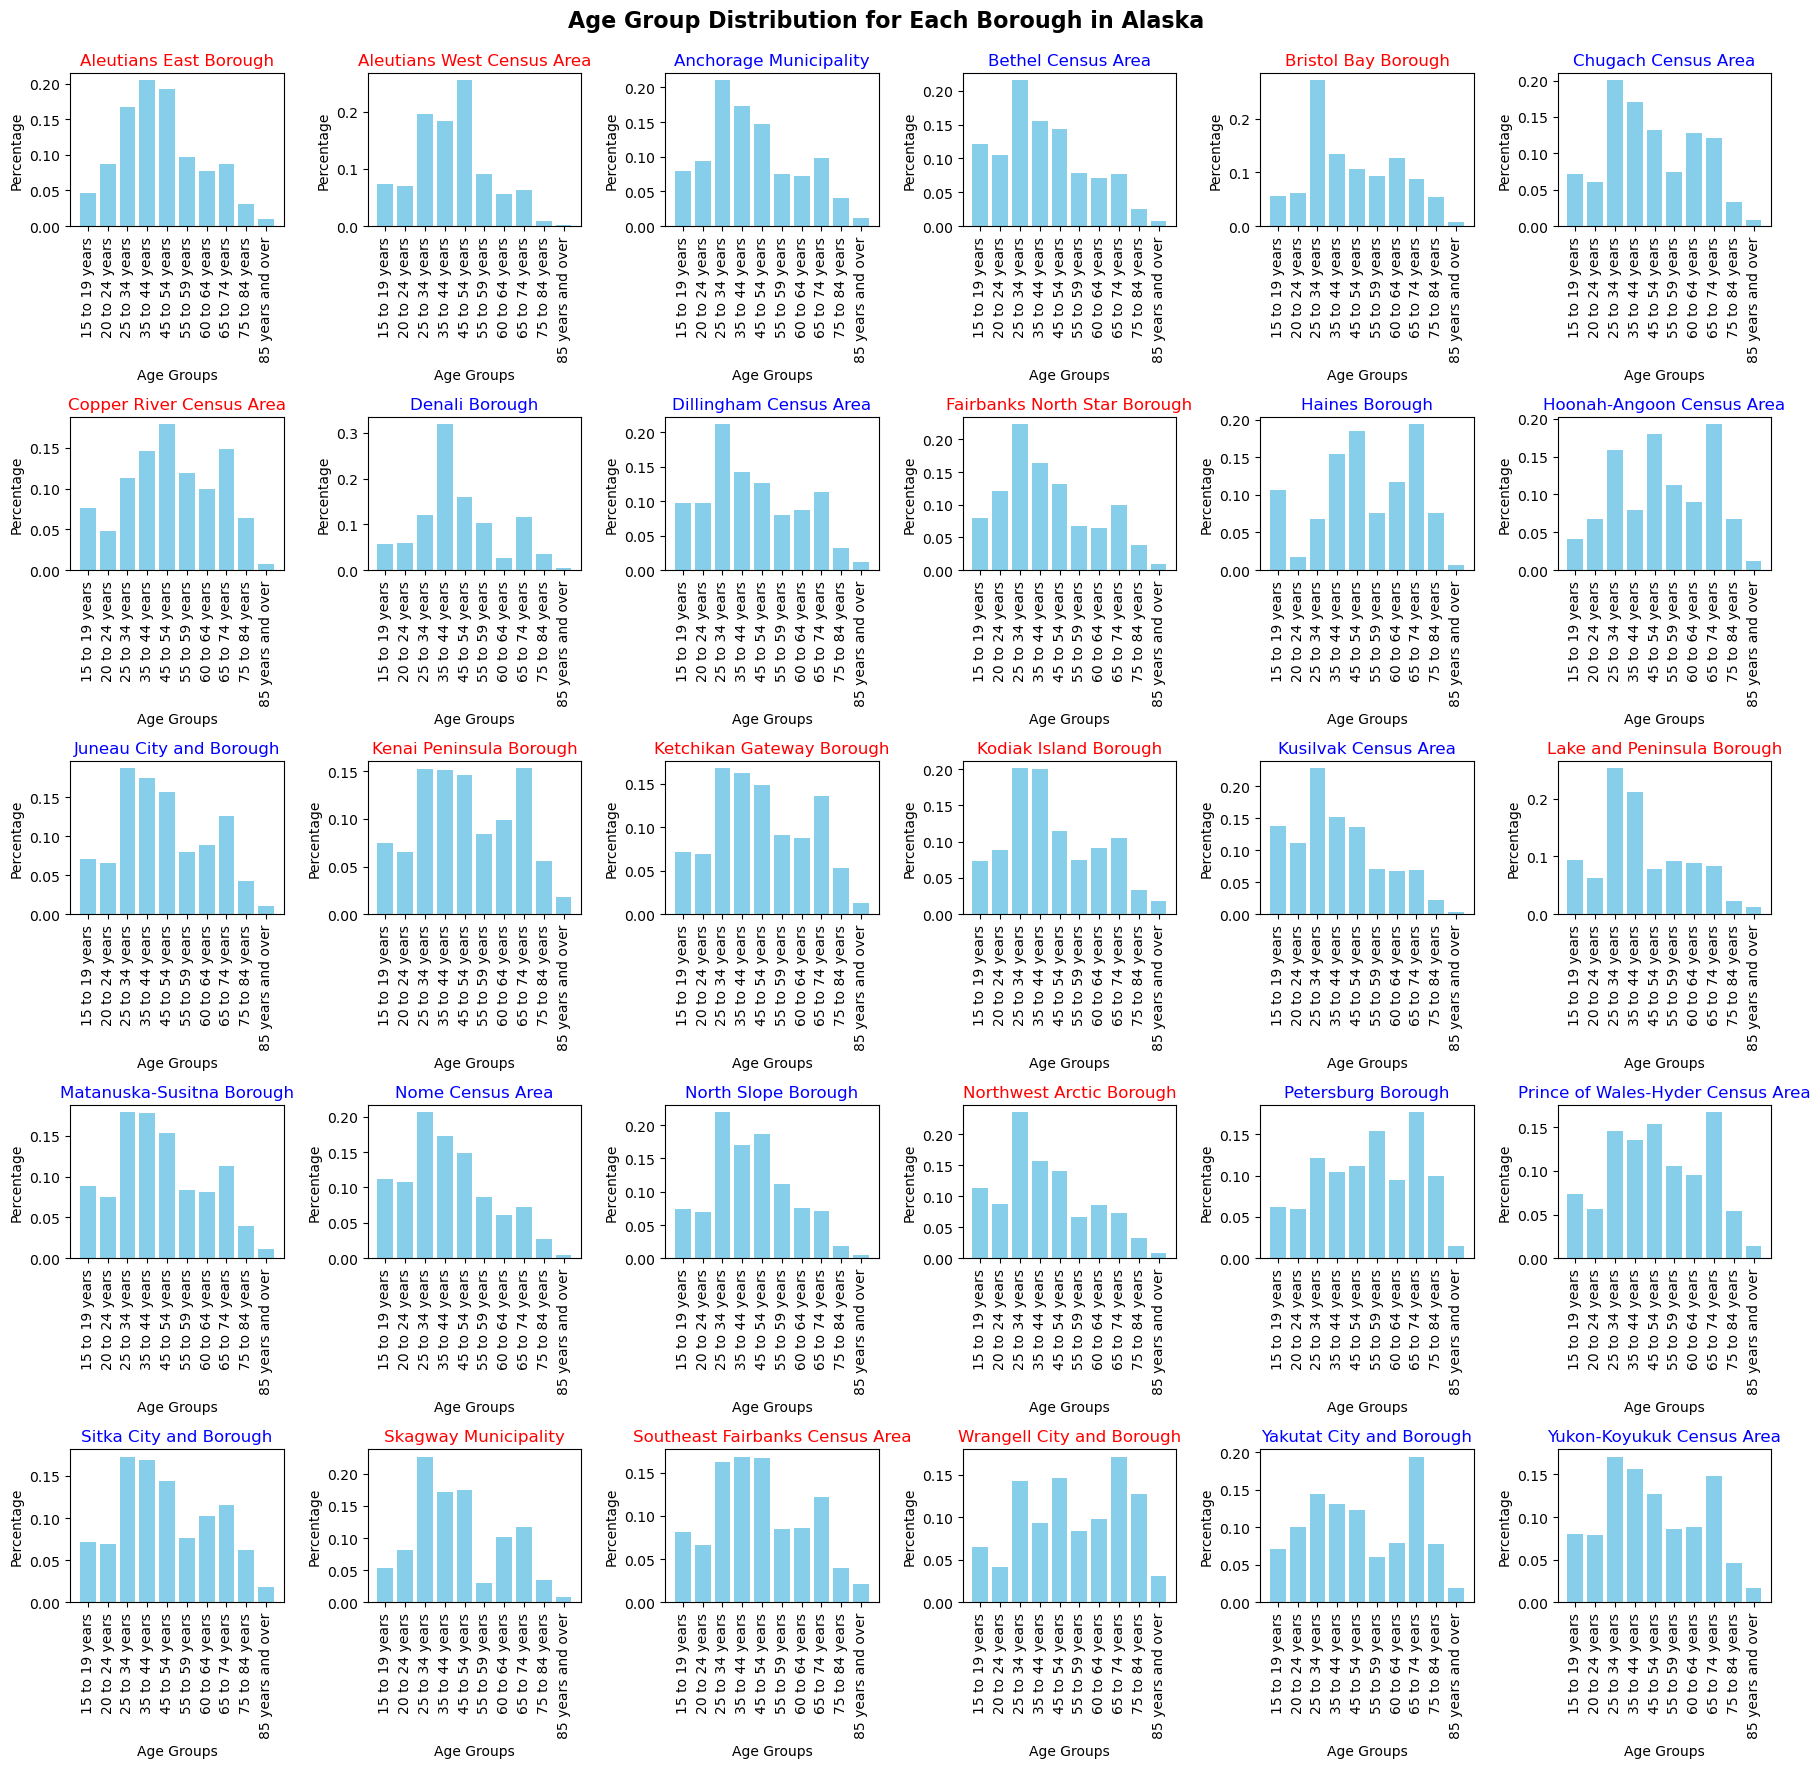

In [614]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of age groups
age_groups=df2.columns[age_group1:age_groupn+1]
party_index_start=df2.columns.get_loc('Democratic')
party_index_end=df2.columns.get_loc('Republic')

def age_group_chart(borough, ax):
    # Extract values for the specific borough
    df_borough = pd.DataFrame(df2[df2['index'] == borough])
    #print(type(df_borough) ) 
    values = list(df_borough.iloc[:, age_group1:age_groupn+1].values.flatten())
    party_votes = list(df_borough.iloc[:, party_index_start:party_index_end+1].values.flatten())

    # Plot on the specific axis (ax)
    ax.bar(age_groups, values, color='skyblue')
    if max(party_votes)==df_borough['Republic'].max() and max(party_votes)==df_borough['Democratic'].max():
        ax.set_title(f'{borough}',color='green')
    elif max(party_votes)==df_borough['Republic'].max():
        ax.set_title(f'{borough}',color='Red')
    elif max(party_votes)==df_borough['Democratic'].max():
        ax.set_title(f'{borough}',color='Blue')
    else:
        ax.set_title(f'{borough}',color='Yellow')

    ax.set_title(f'{borough}')
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=90)

# List of boroughs
boroughs = list(df2['index'])

# Define the number of rows and columns for the subplot grid
rows = 5  # Number of rows
cols = 6  # Number of columns

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 18))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each borough and plot it on the corresponding axis
for i, borough in enumerate(boroughs):
    if i >= len(axes):
        break
    age_group_chart(borough, axes[i])

fig.suptitle('Age Group Distribution for Each Borough in Alaska\n', fontsize=16, fontweight='bold')


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [615]:
#IF WE COLLECT INFORMATION ABOUT PEOPLE DEMOGRAPHICS FROM VOTER TURNOUT DATA THAT WOULD BE REALLY HELPFUL WE CAN KIND OF IDENTIFY MORE ACCURATE
# PATTERNS (IT CAN BE AGE,ETHNICITY, OCCUPATION ETC.,)

In [616]:
df2.columns


Index(['index', 'Democratic', 'Liberation', 'Republic', 'Male', 'Female',
       '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years',
       '75 to 84 years', '85 years and over', 'Cherokee tribal grouping',
       'Chippewa tribal grouping', 'Navajo tribal grouping',
       'Sioux tribal grouping', 'Asian Indian', 'Chinese', 'Filipino',
       'Japanese', 'Korean', 'Vietnamese', 'Other Asian',
       'Native Hawaiian and Other Pacific Islander', 'Chamorro',
       'Native Hawaiian', 'Samoan',
       'Other Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'White and Black or African American',
       'White and American Indian and Alaska Native', 'White and Asian',
       'White and Some Other Race',
       'Black or African American and American Indian and Alaska Native',
       'Black or African American and Some Other Race', 'Mexican',
       'Puerto Rican', 'Cuban

In [617]:
ethnicity_start_index=df2.columns.get_loc('Cherokee tribal grouping')
ethnicity_end_index=len(df2.columns)
df3=df2.copy()
#ETHNICITY DIVISION
#total voter calculation (sum of all the people from every ethnicity for each borough)
total_voters_for_each_borough=df.iloc[:,ethnicity_start_index:ethnicity_end_index].sum(axis=1)
total_voters_for_each_borough=np.expand_dims(total_voters_for_each_borough,axis=1)

df_percentages_ethnicity_group=df2.iloc[:,ethnicity_start_index:ethnicity_end_index].values/total_voters_for_each_borough
df_percentages_ethnicity_group=pd.DataFrame(df_percentages_ethnicity_group,columns=df2.columns[ethnicity_start_index:ethnicity_end_index])


df2[df2.columns[ethnicity_start_index:ethnicity_end_index]]=df_percentages_ethnicity_group[df_percentages_ethnicity_group.columns]

#df.head()
#df2.head()
#df2.iloc[:,age_group1:].sum(axis=1)

/var/folders/mk/vp3g3s3n5x95z3wp07v4vmd00000gn/T/ipykernel_50710/3987902881.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


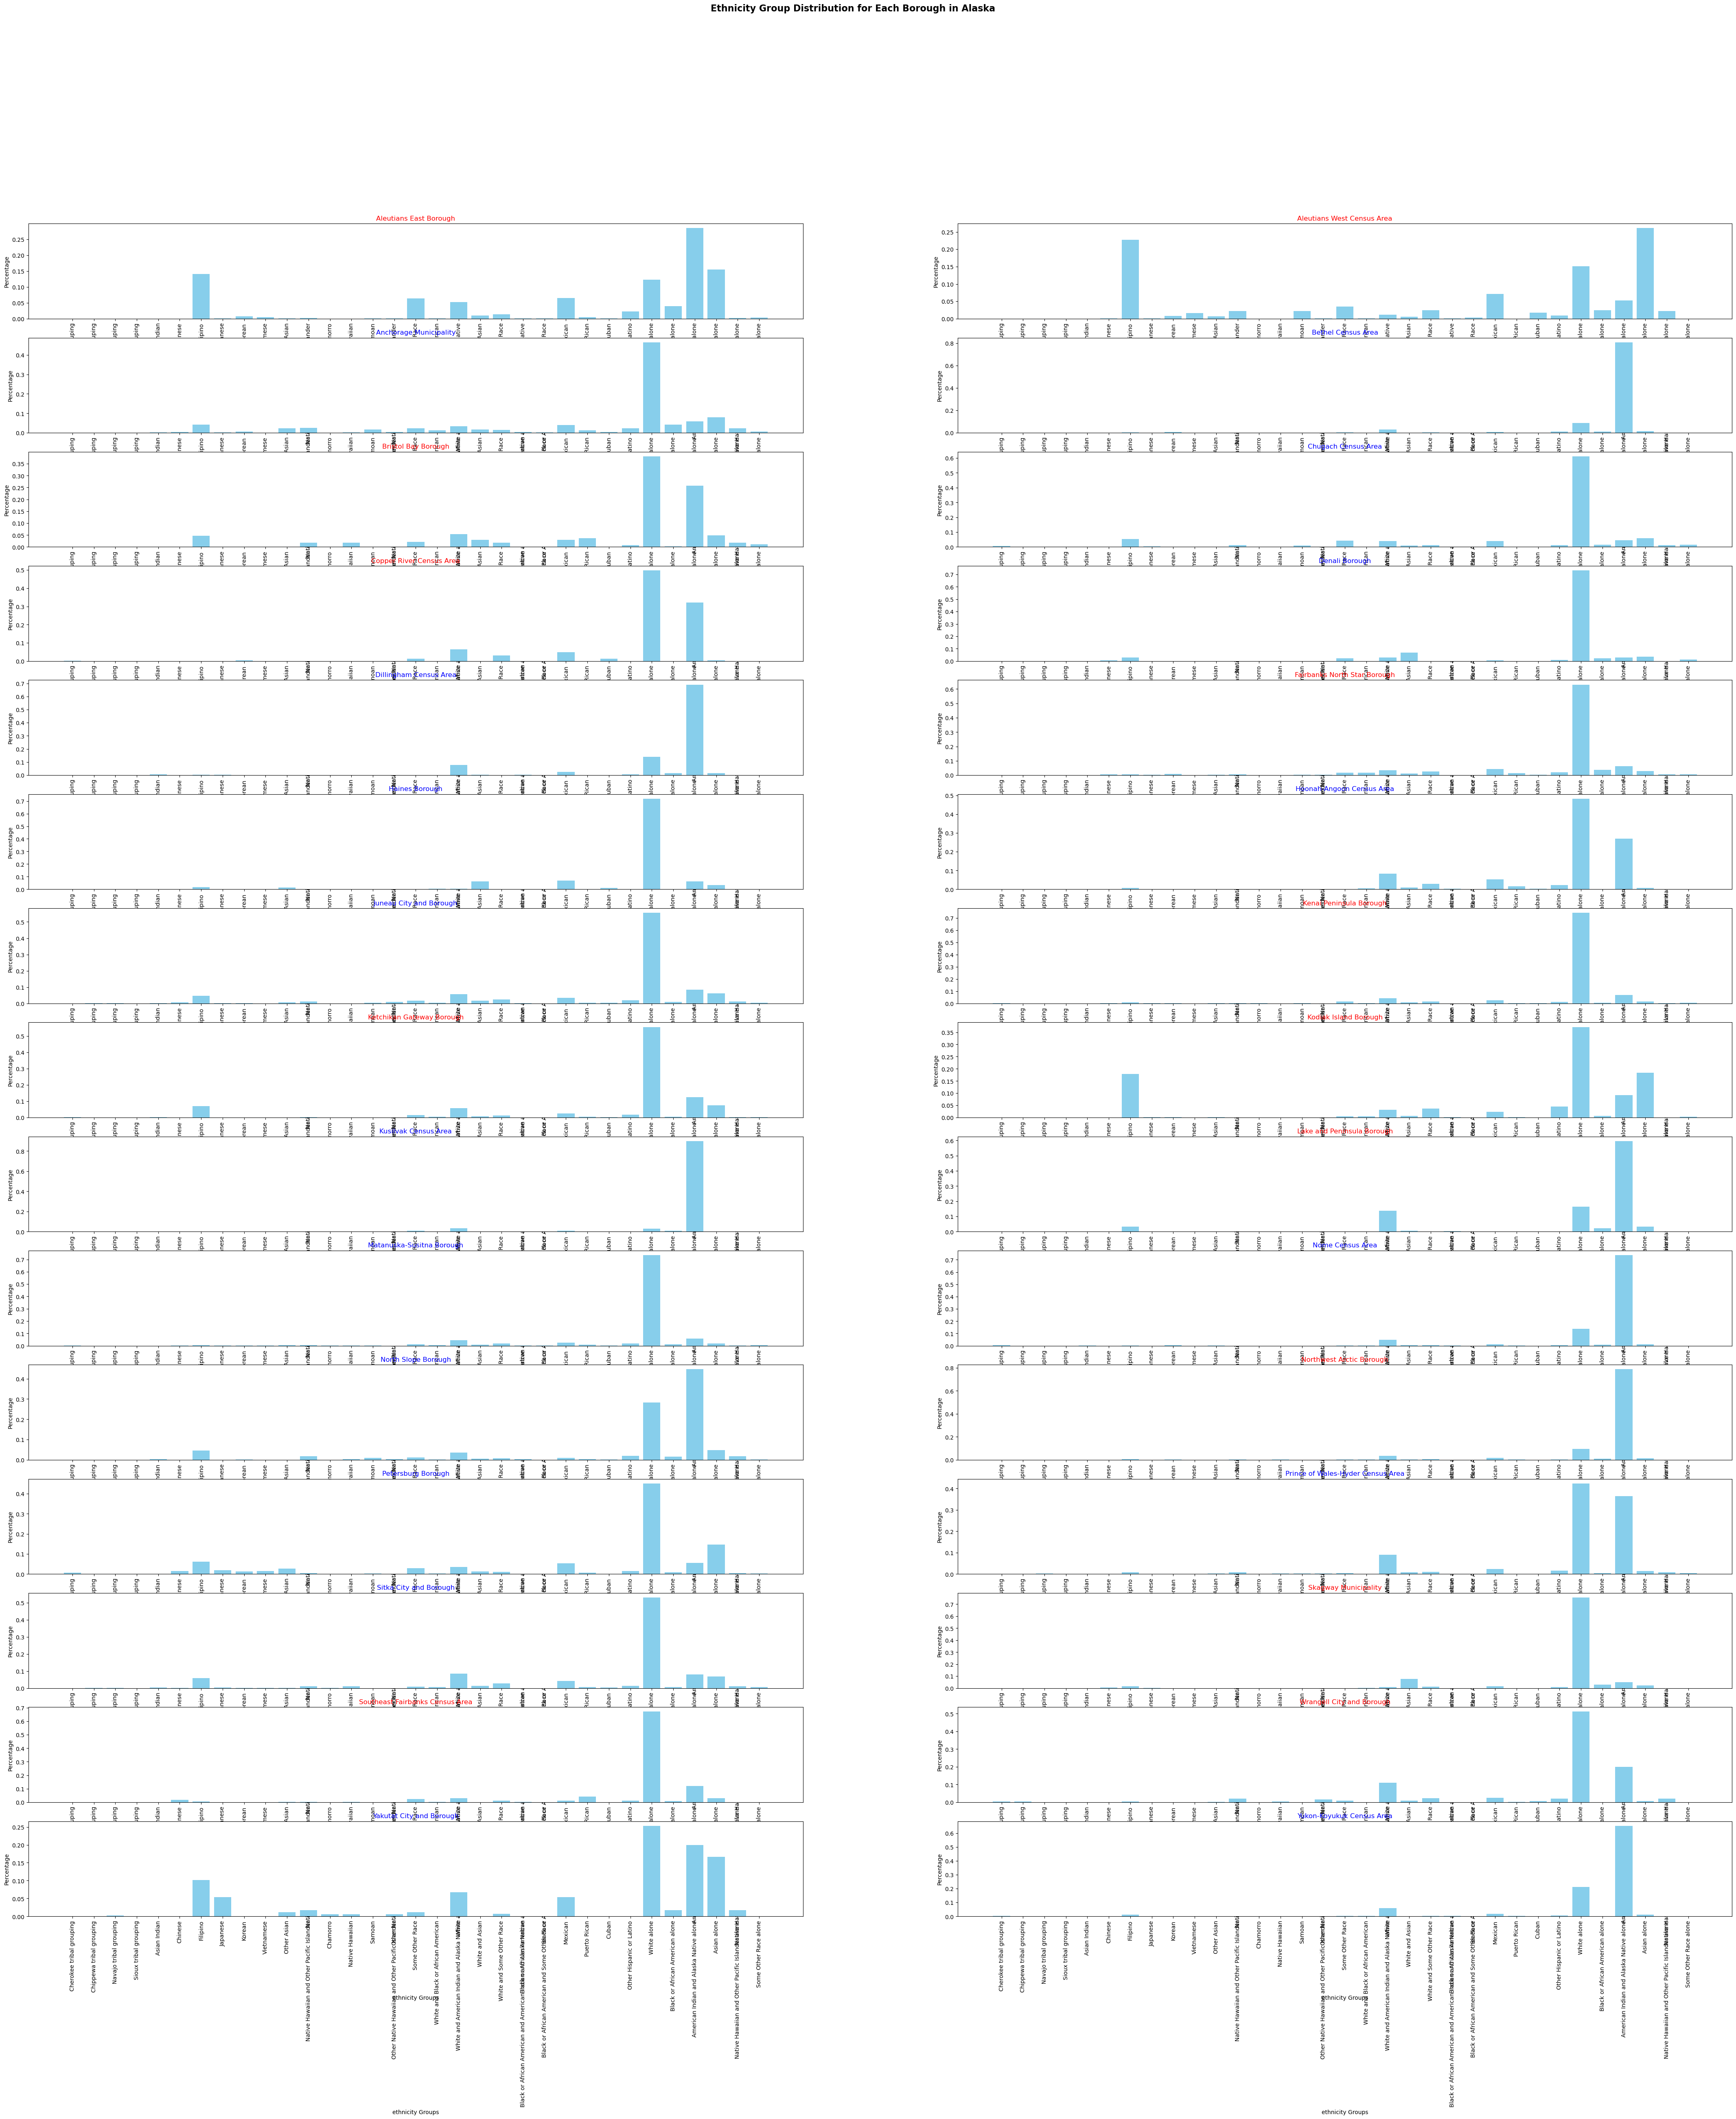

In [618]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of age groups
ethnicity_groups=df2.columns[ethnicity_start_index:ethnicity_end_index]
party_index_start=df2.columns.get_loc('Democratic')
party_index_end=df2.columns.get_loc('Republic')

def ethnicity_group_chart(borough, ax):
    # Extract values for the specific borough
    df_borough = pd.DataFrame(df2[df2['index'] == borough])
    #print(type(df_borough) ) 
    values = list(df_borough.iloc[:, ethnicity_start_index:ethnicity_end_index].values.flatten())
    party_votes = list(df_borough.iloc[:, party_index_start:party_index_end+1].values.flatten())

    # Plot on the specific axis (ax)
    ax.bar(ethnicity_groups, values, color='skyblue')
    if max(party_votes)==df_borough['Republic'].max() and max(party_votes)==df_borough['Democratic'].max():
        ax.set_title(f'{borough}',color='green')
    elif max(party_votes)==df_borough['Republic'].max():
        ax.set_title(f'{borough}',color='Red')
    elif max(party_votes)==df_borough['Democratic'].max():
        ax.set_title(f'{borough}',color='Blue')
    else:
        ax.set_title(f'{borough}',color='Yellow')

    ax.set_title(f'{borough}')
    ax.set_xlabel('ethnicity Groups')
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=90)

# List of boroughs
boroughs = list(df2['index'])

# Define the number of rows and columns for the subplot grid
rows = 15  # Number of rows
cols = 2  # Number of columns

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(54, 54))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each borough and plot it on the corresponding axis
for i, borough in enumerate(boroughs):
    if i >= len(axes):
        break
    ethnicity_group_chart(borough, axes[i])

fig.suptitle('Ethnicity Group Distribution for Each Borough in Alaska\n', fontsize=16, fontweight='bold')


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
